# Text Classification for Spam Detection

In this Grand capstone project we will apply different Natural Language Processing (NLP) techniques to handle and preprocess text data. We will later apply different Machine Learning and Deep Learning models to create a classification model which will predict if an email/sms is spam or ham.

### Problem Statement:
The proliferation of spam messages in communication channels poses a significant challenge, leading to user inconvenience, privacy concerns, and potential security threats. The aim of this project is to develop an efficient text classification model for spam detection, leveraging various techniques, including Bag of Words (BoW), TF-IDF, Word2Vec, and advanced BERT embeddings.

### Criteria for Success:
- Achieve high accuracy in distinguishing between ham and spam messages.
- Develop interpretable models for analysis and insights.
- Implement three different models for performance analysis.
- Compare and contrast the effectiveness of Naive Bayes, Random Forest, and Neural Network models.

### We will follow the following tasks in this notebook:
- Data Cleaning
- Data Preprocessing and EDA
- Modeling

### We will train following Models:
- Naive Bayes Model using BOW & TF-IDF
- Random Forest Model using Word2vec & AvgWord2vec
- Tensorflow Bert Pretrained Model with a single layer neural network

In [28]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv('spam', sep='\t',names=["label","message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.shape

(5572, 2)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Preprocessing and EDA

We will assign encoders to hadle text data as a binary output

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [33]:
data['label'] = encoder.fit_transform(data['label'])

In [34]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ham = 0 and spam = 1

Upon checking we find out we have no mising values now let's look for the duplicates

In [35]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [36]:
data.duplicated().sum()

403

There are 403 duplicate values so lets drop them

In [37]:
data = data.drop_duplicates(keep = 'first')


In [38]:
data.duplicated().sum()

0

In [39]:
data.shape

(5169, 2)

### EDA : Let's perform a basic EDA since we have only 2 columns

In [40]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
data['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

There are 4516 ham values and 653 spam values. Let's create some visualizations to better understand the data

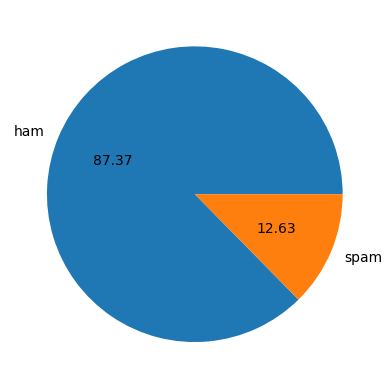

In [42]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels = ['ham', 'spam'], autopct= "%0.2f")
plt.show()

This pie chart shows that our data is imbalanced since there are 87.37% ham messages and 12.63% spam messages. We will do further analysis by creating three new coloums and see if we can find any meaningful insights.
- Number of Characters
- Number of Words
- Number of Sentences

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
data['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [45]:
data['num_characters'] = data['message'].apply(len)
data.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [47]:
data['num_words']= data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [48]:
data['message'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [49]:
data['num_sentences']= data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Let's create the stats for ham and spam messages separately for better understanding

#### Stats for Ham Messages

In [51]:
data[data['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### Stats for Spam Messages

In [52]:
data[data['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


Let's now check correlation between these

<ipython-input-53-53fe516a88e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

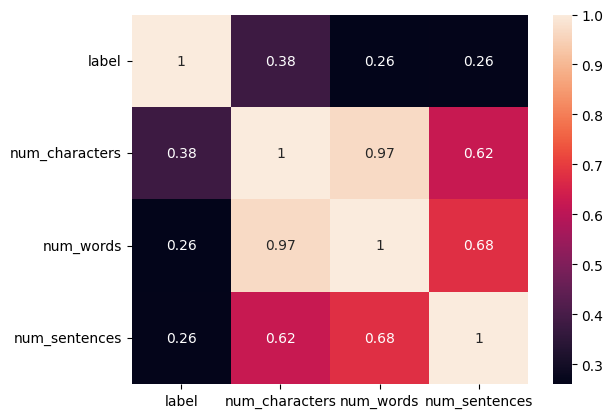

In [53]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

Let's create a histogram for the number of characters since they are the most important among all.

<Axes: xlabel='num_characters', ylabel='Count'>

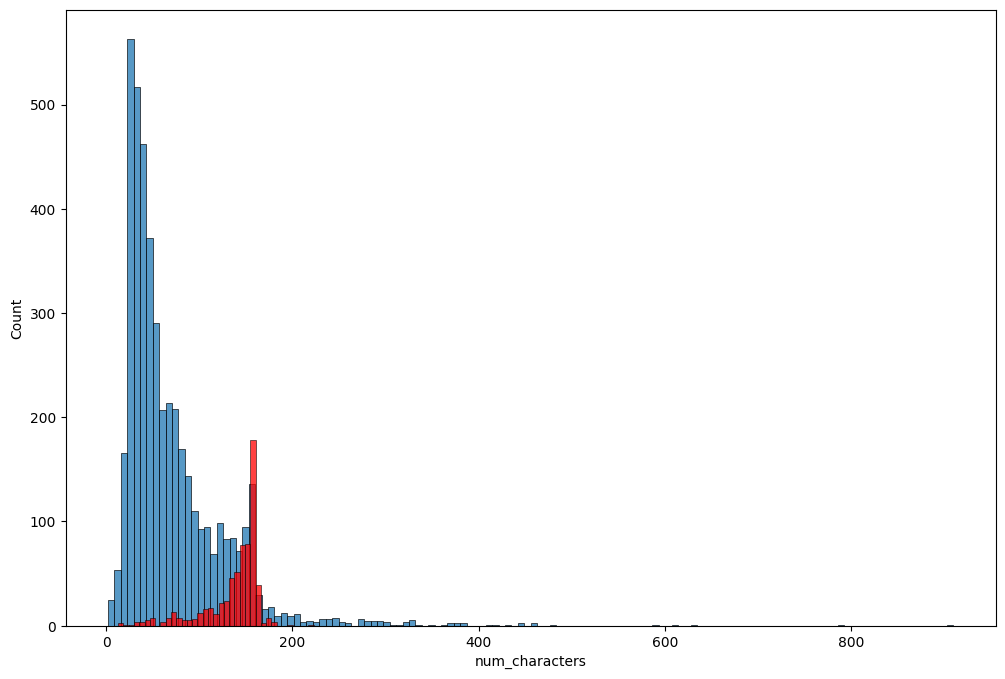

In [54]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.histplot(data[data['label'] == 0]['num_characters'])
sns.histplot(data[data['label'] == 1]['num_characters'], color='red')


### Now we will further preprocess our data by doing following tasks:
- Lower case
- Tokenization
- Removing stopwards
- Stemming

In [55]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
messages = pd.read_csv('spam', sep='\t',names=["label","message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [58]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### Create Bag of Words and Tfidf

In [59]:
## Output Features
y=pd.get_dummies(messages['label'])
y=y.iloc[:,0].values

In [60]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.20)

In [61]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=3000)

tf = TfidfVectorizer(max_features=2500)

In [62]:
len(X_train),len(y_train)

(4457, 4457)

In [63]:
## independent features
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [64]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))
X_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [65]:
cv.vocabulary_

{'free': 918,
 'entri': 766,
 'wkli': 2912,
 'comp': 484,
 'win': 2895,
 'fa': 818,
 'cup': 561,
 'final': 864,
 'tkt': 2643,
 'st': 2450,
 'may': 1519,
 'text': 2590,
 'receiv': 2058,
 'question': 2007,
 'std': 2462,
 'txt': 2717,
 'rate': 2029,
 'appli': 129,
 'men': 1541,
 'like': 1396,
 'shorter': 2325,
 'ladi': 1344,
 'eye': 817,
 'yo': 2987,
 'way': 2848,
 'could': 524,
 'pick': 1836,
 'someth': 2400,
 'tonight': 2666,
 'best': 236,
 'msg': 1633,
 'hard': 1070,
 'person': 1823,
 'know': 1335,
 'one': 1747,
 'step': 2465,
 'make': 1489,
 'fall': 828,
 'love': 1445,
 'amp': 97,
 'back': 191,
 'ruin': 2197,
 'ur': 2763,
 'friendship': 929,
 'good': 1006,
 'night': 1696,
 'got': 1016,
 'tea': 2563,
 'sure': 2524,
 'sad': 2208,
 'puppi': 1978,
 'yup': 2997,
 'yet': 2982,
 'chikku': 428,
 'wat': 2842,
 'abt': 9,
 'tht': 2626,
 'guy': 1046,
 'stop': 2471,
 'irrit': 1247,
 'time': 2637,
 'think': 2610,
 'need': 1676,
 'near': 1670,
 'campu': 367,
 'electr': 747,
 'went': 2871,
 'fml': 88

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("Precission:", precision_score(y_test,y_pred1))

Accuracy: 0.8457399103139014
[[128  18]
 [154 815]]
Precission: 0.978391356542617


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred1))
print("Precission:", precision_score(y_test,y_pred2))

Accuracy: 0.9883408071748879
[[128  18]
 [154 815]]
Precission: 0.9907597535934292


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("Precission:", precision_score(y_test,y_pred3))

Accuracy: 0.9802690582959641
[[125  21]
 [  1 968]]
Precission: 0.9787664307381193


After training multiple models we get the best results from Multinomial Naive Bayes model using CountVectorizer with Max_features = 3000.

## Word2vec & AvgWord2vec

Word2vec is a technique in natural language processing (NLP) for obtaining vector representations of words.

word2vec is not a singular algorithm, rather, it is a family of model architectures and optimizations that can be used to learn word embeddings from large datasets. Embeddings learned through word2vec have proven to be successful on a variety of downstream natural language processing tasks.

We will train a Random Forest classifier by creating Word2vec from scratch.

In [71]:
!pip install gensim

In [72]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [73]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [74]:
messages.shape

(5572, 2)

In [75]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [76]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, messages['message']) if i<1]

[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

In [77]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [78]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [79]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))


In [80]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [81]:
# Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words)

# To Get All the Vocabulary
model.wv.index_to_key

['to',
 'you',
 'the',
 'it',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'ur',
 'will',
 'if',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'ok',
 'day',
 'what',
 'free',
 'from',
 'all',
 'out',
 'know',
 'll',
 'come',
 'like',
 'good',
 'time',
 'am',
 'then',
 'got',
 'wa',
 'there',
 'he',
 'love',
 'text',
 'only',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'by',
 'going',
 'don',
 'stop',
 'home',
 'she',
 'about',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'dont',
 'our',
 'think',
 'tell',
 'week',
 'hi',
 'phone',
 'they',
 'new',
 'please',
 'later',
 'pls',
 'any',
 'her',
 'ha',
 'co',
 'did',
 'been',
 'msg',
 'min',
 'some',
 'an',
 'night',
 'make',
 'dear',
 'who',
 'here',
 'message',
 'say',
 'well',
 'where',
 're',
 'thing',
 'much',
 'oh',

In [82]:
model.corpus_count

5569

In [83]:
model.epochs

5

In [84]:
words[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [85]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)

    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [86]:
!pip install tqdm

In [87]:
from tqdm import tqdm

In [88]:
#apply for the entire sentences
import numpy as np
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

  5%|▌         | 298/5569 [00:00<00:01, 2972.67it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5569/5569 [00:01<00:00, 3505.64it/s]


In [89]:
len(X)

5569

In [90]:
##independent Features
X_new=np.array(X)

<ipython-input-90-c24378517c84>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new=np.array(X)


In [91]:
X_new.shape

(5569,)

In [92]:
## Dependent Features
## Output Features
y = messages[list(map(lambda x: len(x)>0 ,corpus))]
y=pd.get_dummies(y['label'])
y=y.iloc[:,0].values

In [93]:
X[0].reshape(1,-1).shape

(1, 100)

In [94]:
## this is the final independent features
df=pd.DataFrame()
for i in range(0,len(X)):
    df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)


<ipython-input-94-320740ab05e8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)


In [95]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.164473,0.227577,0.109679,0.086072,0.080990,-0.515478,0.168473,0.476711,-0.255430,-0.184987,...,0.365414,0.165159,0.041092,0.023776,0.449347,0.239714,0.105376,-0.250952,0.188528,0.015659
1,-0.153697,0.197702,0.093711,0.074188,0.074715,-0.448589,0.134296,0.418198,-0.223344,-0.152952,...,0.322077,0.138218,0.029231,0.014293,0.380075,0.205760,0.091674,-0.227169,0.170628,0.005565
2,-0.174487,0.245615,0.122563,0.093858,0.066067,-0.555082,0.174891,0.469703,-0.266859,-0.216111,...,0.358685,0.168829,0.038414,-0.003673,0.454019,0.225713,0.055645,-0.282578,0.210292,0.034523
3,-0.228355,0.301281,0.140238,0.119289,0.112273,-0.691461,0.215413,0.643607,-0.348283,-0.238400,...,0.490904,0.215843,0.045053,0.036612,0.588939,0.326653,0.152639,-0.344213,0.254549,0.011477
4,-0.200975,0.250283,0.127602,0.098303,0.103526,-0.587826,0.182506,0.551284,-0.299287,-0.211447,...,0.423004,0.179301,0.045525,0.034313,0.502429,0.281585,0.126695,-0.298603,0.210973,0.008977


In [96]:
df['Output']=y

In [97]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
0,-0.164473,0.227577,0.109679,0.086072,0.080990,-0.515478,0.168473,0.476711,-0.255430,-0.184987,...,0.165159,0.041092,0.023776,0.449347,0.239714,0.105376,-0.250952,0.188528,0.015659,1
1,-0.153697,0.197702,0.093711,0.074188,0.074715,-0.448589,0.134296,0.418198,-0.223344,-0.152952,...,0.138218,0.029231,0.014293,0.380075,0.205760,0.091674,-0.227169,0.170628,0.005565,1
2,-0.174487,0.245615,0.122563,0.093858,0.066067,-0.555082,0.174891,0.469703,-0.266859,-0.216111,...,0.168829,0.038414,-0.003673,0.454019,0.225713,0.055645,-0.282578,0.210292,0.034523,0
3,-0.228355,0.301281,0.140238,0.119289,0.112273,-0.691461,0.215413,0.643607,-0.348283,-0.238400,...,0.215843,0.045053,0.036612,0.588939,0.326653,0.152639,-0.344213,0.254549,0.011477,1
4,-0.200975,0.250283,0.127602,0.098303,0.103526,-0.587826,0.182506,0.551284,-0.299287,-0.211447,...,0.179301,0.045525,0.034313,0.502429,0.281585,0.126695,-0.298603,0.210973,0.008977,1


In [98]:
df.dropna(inplace=True)

In [99]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
Output    0
Length: 101, dtype: int64

In [100]:
## Independent Feature
X=df

In [101]:
X.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
Output    0
Length: 101, dtype: int64

In [102]:
y=df['Output']

In [103]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [104]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
747,-0.216304,0.262391,0.137385,0.101079,0.106685,-0.629195,0.188726,0.567313,-0.312388,-0.233218,...,0.181629,0.043486,0.022111,0.517984,0.286963,0.107430,-0.317915,0.219371,0.020656,1
605,-0.173919,0.229181,0.113952,0.088453,0.077196,-0.521208,0.166484,0.480869,-0.260493,-0.181685,...,0.170215,0.035152,0.027734,0.444774,0.239030,0.096598,-0.259929,0.197179,0.010912,1
117,-0.177227,0.252177,0.132036,0.099594,0.079825,-0.556090,0.184030,0.495322,-0.276069,-0.217138,...,0.169484,0.041748,0.009475,0.468166,0.235191,0.075185,-0.280730,0.202374,0.029749,0
5427,-0.223901,0.275313,0.140915,0.111329,0.123589,-0.663738,0.202103,0.620996,-0.333881,-0.249379,...,0.195949,0.046117,0.037174,0.555243,0.311251,0.135863,-0.333240,0.224176,0.011676,1
4653,-0.245468,0.281735,0.148831,0.103304,0.138568,-0.676602,0.200189,0.634448,-0.341828,-0.236083,...,0.189991,0.042853,0.052336,0.575252,0.342488,0.165642,-0.339699,0.217111,0.002456,1


In [105]:
y_train

747     1
605     1
117     0
5427    1
4653    1
       ..
4729    1
2196    1
4981    1
4484    1
786     1
Name: Output, Length: 4445, dtype: uint8

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
X_train.columns = X_train.columns.astype(str)
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
X_test.columns = X_test.columns.astype(str)
y_pred7=classifier.predict(X_test)

In [113]:
print("Accuracy:", accuracy_score(y_test,y_pred7))
print(confusion_matrix(y_test,y_pred7))
print("Precission:", precision_score(y_test,y_pred7))



Accuracy: 0.9991007194244604
[[146   1]
 [  0 965]]
Precission: 0.9989648033126294


In [114]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       1.00      1.00      1.00       965

    accuracy                           1.00      1112
   macro avg       1.00      1.00      1.00      1112
weighted avg       1.00      1.00      1.00      1112



We Got some amazing results from our Random Forest model by training a word2vec from scratch. We got an accuracy of 99% and a precision of 99% which is greatest so far.

# Text Classification Model using Bert

We will create a Single layer Neural Network using Bert Pretrained Model. BERT and other Transformer encoder architectures have been wildly successful on a variety of tasks in NLP (natural language processing). They compute vector-space representations of natural language that are suitable for use in deep learning models. The BERT family of models uses the Transformer encoder architecture to process each token of input text in the full context of all tokens before and after, hence the name: Bidirectional Encoder Representations from Transformers.

BERT models are usually pre-trained on a large corpus of text, then fine-tuned for specific tasks.

In [115]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.3 MB/s eta 0:00:00


In [116]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [117]:
df = pd.read_csv('spam', sep='\t',names=["label","message"])

In [118]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [119]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We will use the Downsampling technique to handle imbalance data.
Downsampling is a mechanism that reduces the count of training samples falling under the majority class. As it helps to even up the counts of target categories. By removing the collected data, we tend to lose valuable information.

In [120]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [121]:
747/4825

0.15481865284974095

In [122]:
df_spam = df[df['label'] == 'spam']
df_spam.shape

(747, 2)

In [123]:
df_ham = df[df['label'] == 'ham']
df_ham.shape

(4825, 2)

In [124]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [125]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [126]:
df_balanced['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [127]:
df_balanced['spam'] = df_balanced['label'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(10)

,label,message,spam
4069,spam,TBS/PERSOLVO. been chasing us since Sept for£3...,1
4821,spam,Check Out Choose Your Babe Videos @ sms.shsex....,1
218,ham,Easy ah?sen got selected means its good..,0
1022,spam,Guess what! Somebody you know secretly fancies...,1
1069,spam,Someone U know has asked our dating service 2 ...,1
2770,spam,Burger King - Wanna play footy at a top stadiu...,1
1449,spam,As a registered optin subscriber ur draw 4 £10...,1
392,ham,Hey so this sat are we going for the intro pil...,0
591,spam,For ur chance to win a £250 wkly shopping spre...,1
824,spam,25p 4 alfie Moon's Children in need song on ur...,1


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_balanced['message'], df_balanced['spam'], stratify=df_balanced['spam'])

In [129]:
X_train.head(4)

1845             Da is good good player.why he is unsold.
1351                               Bugis oso near wat... 
0       Go until jurong point, crazy.. Available only ...
955             Filthy stories and GIRLS waiting for your
Name: message, dtype: object

In [130]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [131]:
def get_sentence_embeding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "FREE RING TONE just text POLYS to 87131",
    "Natalie (20/F) is inviting you to be her fried"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.813, -0.41, -0.725, 0.69, 0.46, -0.278, 0.758, 0.214, -0.287, -1, -0.0914, 0.686, 0.964, 0.24, 0.832, -0.519, -0.127, -0.54, 0.34, -0.184, 0.581, 1, 0.105, 0.206, 0.366, 0.861, -0.438, 0.868, 0.91, 0.713, ..., 1, -0.552, -0.58, -0.419, -0.441, 0.382, -0.541, -1, 0.391, -0.264, 0.463, -0.373, 0.629, -0.436, -0.942, -0.372, 0.474, 0.41, -0.472, -0.479, 0.54, 0.0222, 0.814, 0.808, 0.00882, 0.181, 0.596, -0.633, -0.662, 0.78],
       [-0.805, -0.325, -0.744, 0.701, 0.534, -0.072, 0.739, 0.223, -0.402, -1, -0.193, 0.695, 0.98, 0.261, 0.903, -0.529, 0.075, -0.567, 0.288, -0.121, 0.641, 1, 0.445, 0.235, 0.344, 0.922, -0.686, 0.926, 0.938, 0.691, ..., 1, -0.544, -0.557, -0.351, -0.273, 0.306, -0.347, -1, 0.276, -0.159, 0.463, -0.289, 0.539, -0.347, -0.952, -0.102, 0.202, 0.497, -0.324, -0.322, 0.559, 0.108, 0.853, 0.859, -0.242, 0.416, 0.561, -0.351, -0.622, 0.88]], dtype=float32)>

In [132]:
# Bert Layer
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural Network Layer
NN = tf.keras.layers.Dropout(0.1, name = 'dropout')(outputs['pooled_output'])
NN = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(NN)

## construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[NN])


In [133]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [134]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = METRICS)

In [135]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 21s 313ms/step - loss: 0.6724 - accuracy: 0.5616 - precision: 0.5586 - recall: 0.5875
Epoch 2/10
35/35 [==============================] - 11s 312ms/step - loss: 0.5497 - accuracy: 0.7518 - precision: 0.7621 - recall: 0.7321
Epoch 3/10
35/35 [==============================] - 11s 314ms/step - loss: 0.4616 - accuracy: 0.8411 - precision: 0.8399 - recall: 0.8429
Epoch 4/10
35/35 [==============================] - 12s 332ms/step - loss: 0.4112 - accuracy: 0.8670 - precision: 0.8489 - recall: 0.8929
Epoch 5/10
35/35 [==============================] - 11s 308ms/step - loss: 0.3746 - accuracy: 0.8795 - precision: 0.8774 - recall: 0.8821
Epoch 6/10
35/35 [==============================] - 12s 335ms/step - loss: 0.3527 - accuracy: 0.8795 - precision: 0.8645 - recall: 0.9000
Epoch 7/10
35/35 [==============================] - 11s 320ms/step - loss: 0.3327 - accuracy: 0.8893 - precision: 0.8785 - recall: 0.9036
Epoch 8/10
35/35 [================

In [136]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 333ms/step - loss: 0.3113 - accuracy: 0.8930 - precision: 0.8585 - recall: 0.9412


[0.3112565279006958, 0.893048107624054, 0.8585366010665894, 0.9411764740943909]

In [137]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 4s 309ms/step


In [138]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 

In [139]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[158,  29],
       [ 11, 176]])

Text(50.722222222222214, 0.5, 'Truth')

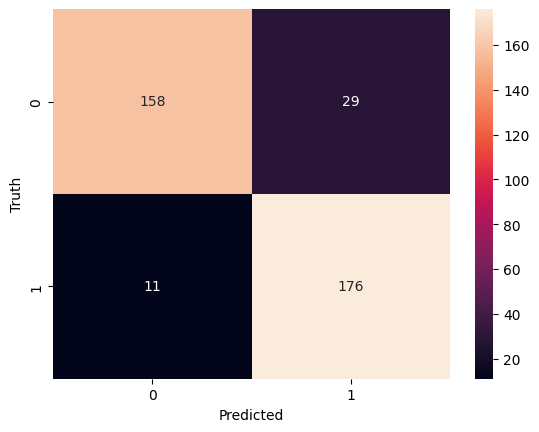

In [140]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       187
           1       0.86      0.94      0.90       187

    accuracy                           0.89       374
   macro avg       0.90      0.89      0.89       374
weighted avg       0.90      0.89      0.89       374



## Conclusion:
In this Capstone project, Text Classification for Spam Detection we worked through a series of tasks such as Data Collection, Data Preprocessing, EDA and Modeling. We performed different NLP techniques and created three models:
- Naive Bayse
We Created a Naive Bayse model using Bag of Words (BoW), Multinomial Naive Bayes model using CountVectorizer with Max_features = 3000 gave the best results with an Accuracy of 98% and Precision of 99%.
- Random Forest 
We Got some amazing results from our Random Forest model by training a word2vec from scratch. We got an Accuracy of 99% and a Precision of 99%. 
- Neural Network 
We created a single layer neural network using Bert embedding ( pre-trained model ). Didn't get very good Precision score as we're looking for precision here.

So our best model with a Precision and Accuracy of 99% is Random Forest using Word2vec. 



